In [3]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

# solve LP
m = GEKKO(remote=False)
x1,x2 = m.Array(m.Var,2,lb=0)
m.Equations([6*x1+3*x2>=120,6*x1+3*x2<=240,1*x1+3*x2>=60,9*x1+x2>=36,6*x1+6*x2>=180,x1>=0,x2>=0])
m.Minimize(x1+2*x2)
m.solve(disp=False)
x1opt = x1.value[0]; x2opt = x2.value[0]
print('x1 = ',round(x1opt))
print('x2 = ',round(x2opt))
print('z = ',round(x1opt+2*x2opt))

x1 =  15
x2 =  15
z =  30


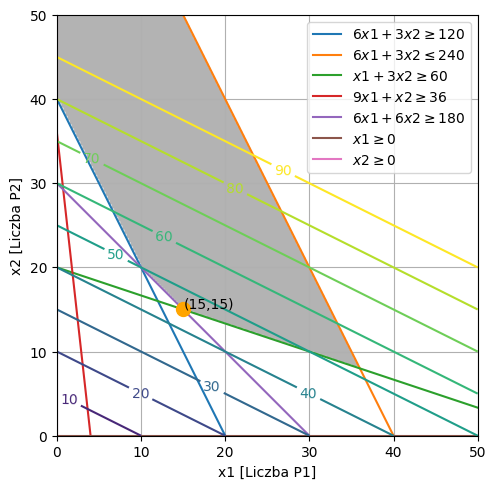

In [15]:
# visualize solution
g = np.linspace(0,50,200)
x,y = np.meshgrid(g,g)
obj = x+2*y
plt.imshow(((6*x+3*y>=120)&(6*x+3*y<=240)&(1*x+3*y>=60)&(9*x+1*y>=36)&(6*x+6*y>=180)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(0, 50, 200)
y0 = 40-2*x0   # 6*x+4*y<=24
y1 = 80-2*x0   # x+2*y<=6
y2 = 20-x0/3
y3 = 36-9*x0
y4 = 30-x0
y5 = 0*x0

plt.plot(x0, y0, label=r'$6x1+3x2\geq120$')
plt.plot(x0, y1, label=r'$6x1+3x2\leq240$')
plt.plot(x0, y2, label=r'$x1+3x2\geq60$')
plt.plot(x0, y3, label=r'$9x1+x2\geq36$')
plt.plot(x0, y4, label=r'$6x1+6x2\geq180$')
plt.plot(x0, y5, label=r'$x1\geq0$')
plt.plot([0,0],[0,500], label=r'$x2\geq0$')
xv = [round(x1opt)]; yv = [round(x2opt)]
#plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(0,100,10))
plt.clabel(CS, inline=1, fontsize=10)
# optimal point
plt.plot([x1opt],[x2opt],marker='o',color='orange',markersize=10)
plt.xlim(0,50); plt.ylim(0,50); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x1 [Liczba P1]'); plt.ylabel('x2 [Liczba P2]')
plt.savefig('plot.png',dpi=300)
plt.show()

In [ ]:
#Należy zakupić 15 sztuk P1 oraz 15 sztuk P2 - łączny koszt zakupu wynosi 45.